In [18]:
!pip uninstall networkx -y

Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Successfully uninstalled networkx-2.6.3


In [15]:
!pip uninstall scipy -y

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3


In [1]:
pip install scipy==1.8

^C
Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install networkx
!pip install matplotlib

     ---------------------------------------- 2.0/2.0 MB 240.7 kB/s eta 0:00:00


In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

In [4]:
#read graphs from dataset
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)
#generate a random graph
V = nx.gnp_random_graph(4039, 0.11)

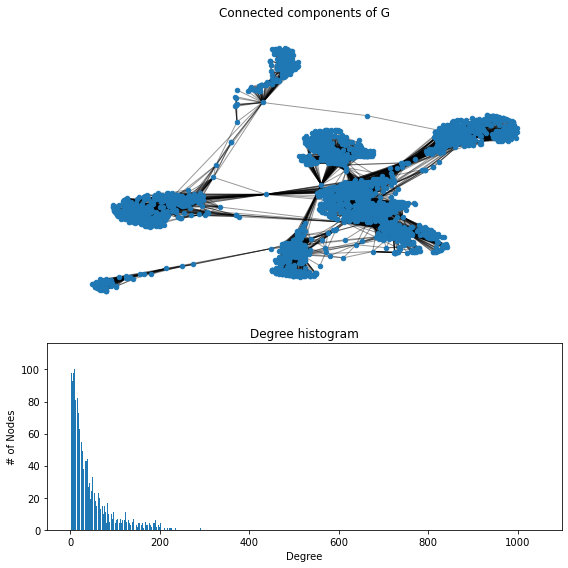

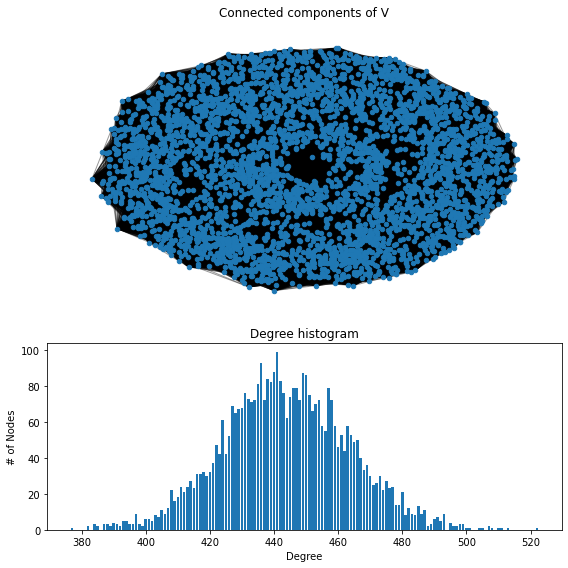

In [7]:
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()
    
    
    
plot_graph(G,"G")
plot_graph(V,"V")

In [10]:

def plotV2(title='',xlabel='',ylabel='',dictionary=None,width_par=4.0,no_keys=False):
    plt.title(title)
    #od = collections.OrderedDict(sorted(d.items()))
    if not no_keys:
        plt.bar(dictionary.keys(),dictionary.values(),width=width_par)# A bar chart
    else:
        plt.bar(range(len(dictionary.keys())),dictionary.values(),width=width_par)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def metrics_calculation(G,V):
    Graphs=[G,V]
    names=["G","V"]
    for i in range(2):
        print("-"*20)
        print("Graph "+names[i]+"\n")
        nodelen=len(Graphs[i].nodes())
        print("Number of vertexes")
        print(len(Graphs[i].nodes()))
        print("-"*5)
        print("Number of Edges")
        print(len(Graphs[i].edges()))
        print("-"*5)
        plotV2(title="Node_Degrees",dictionary=dict(Graphs[i].degree(Graphs[i].nodes())),
               ylabel="Degree",xlabel="Nodes",width_par=4.0)
        #od = collections.OrderedDict(sorted(d.items()))
        #plt.bar([k for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])]
        #,[v for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])],width=4.0,align='center') # A bar chart
        #plt.ylabel('Degree')
        #plt.show()
        #plt.title("All shortest path lengths")
        #print(dict(nx.all_pairs_shortest_path_length(G)))

        def sh_pa():
            paths={}
            for k,paths_vertex in nx.all_pairs_shortest_path_length(Graphs[i]):
                for v,path in paths_vertex.items():
                    paths[k+' '+v]=path
            from collections import Counter
            returned=dict(Counter(paths.values()))
            del returned[0]
            return returned

        plotV2(title="All shortest path lengths",xlabel="Distances",ylabel="Nodes_Ammount",dictionary=sh_pa(),width_par=0.8)
        #plt.bar([k for k in sh_pa().keys()],[v for v in sh_pa().values()]) # A bar chart
        #plt.xlabel('Distances')
        #plt.ylabel('Nodes_Ammount')
        #plt.show()
        j=1
        plotV2(title="Eccentricity for Subgraph"+str(j),xlabel="Nodes",ylabel="Eccentricity",
               dictionary=dict(nx.eccentricity(Graphs[i])))
        print("Radius for Subgraph"+str(j))#max distance
        print(nx.radius(Graphs[i]))
        print("-"*5)
        print("Diameter for Subgraph"+str(j))#min distance
        print(nx.diameter(Graphs[i]))
        print("-"*5)
        j+=1
        plotV2(title="Closseness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.closeness_centrality(Graphs[i]))
        plotV2(title="Betweness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.betweenness_centrality(Graphs[i]))
        plotV2(title="Degree_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.degree_centrality(Graphs[i]))
        plotV2(title="Eigenvector_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.eigenvector_centrality(Graphs[i]))
        #katz
        plotV2(title="Edge_Betweeness_Centrality",xlabel="Nodes",ylabel="Centrality",
               dictionary=nx.edge_betweenness_centrality(Graphs[i]),no_keys=True)
        plotV2(title="Clustering_Coefficient (local)",xlabel="Nodes",ylabel="Coefficient",dictionary=nx.clustering(Graphs[i]))
        print("Clustering_Coefficient (global)")
        G_help=nx.complete_graph(len(Graphs[i].nodes()))
        print(len(Graphs[i].edges())/len(G_help.edges()))
        print("-"*5)
        print("Average_Clustering")
        print(nx.average_clustering(Graphs[i]))
        print("-"*5)
        plotV2(title="Triangles",xlabel="Nodes",ylabel="Centrality",dictionary=nx.triangles(Graphs[i]))
    
    """
    def metrics_calculation3(G):
        plotV2(title="Closseness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.closeness_centrality(G)
               ,width_par=4.0)
        plotV2(title="Betweness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.betweenness_centrality(G),
               width_par=4.0)
        plotV2(title="Degree_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.degree_centrality(G),
               width_par=4.0)
        plotV2(title="Eigenvector_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.eigenvector_centrality(G),
               width_par=4.0)
        katz
        plotV2(title="Edge_Betweeness_Centrality",xlabel="Nodes",ylabel="Centrality",
               dictionary=nx.edge_betweenness_centrality(G),width_par=4.0)
        print("Closseness_Centrality")
        print(nx.closeness_centrality(G))#how fast unformation is transfered via v
        print("-"*5)
        print("Betweenness_Centrality")
        print(nx.betweenness_centrality(G))#precent of shortest paths using v
        print("-"*5)
        print("Degree_Centrality")
        print(nx.degree_centrality(G))# sum of weights of edges using v
        print("-"*5)
        print("Eigenvector_Centrality")
        print(nx.eigenvector_centrality(G))#value of v depending by its neighbors
        print("-"*5)
        print("Katz_Centrality")
        #print(nx.katz_centrality(G)) 
        #discuss help
        print("-"*5)
        print("Edge_Betweeness_Centrality")#precent of shortest paths using v
        print(nx.edge_betweenness_centrality(G))
        print("-"*5)    
    def metrics_calculation4(G):
        print("Clustering_Coefficient (local)")
        print(nx.clustering(G))
        print("-"*5)
        print("Clustering_Coefficient (global)")
        G_help=nx.complete_graph(len(G.nodes()))
        print(len(G.edges())/len(G_help.edges()))
        print("-"*5)
        print("Average_Clustering")
        print(nx.average_clustering(G))
        print("-"*5)
        print("Transitivity")
        print(nx.transitivity(G))
        print("-"*5)
        print("Triangles")
        print(nx.triangles(G))
        print("-"*5)
    """

--------------------
Graph G

Number of vertexes
4039
-----
Number of Edges
88234
-----


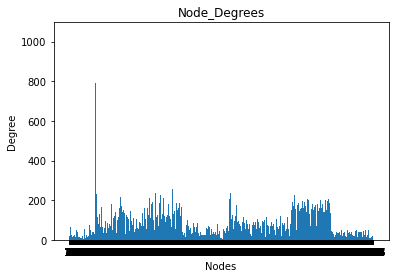

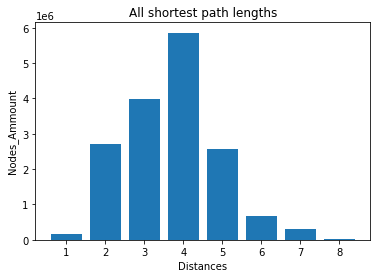

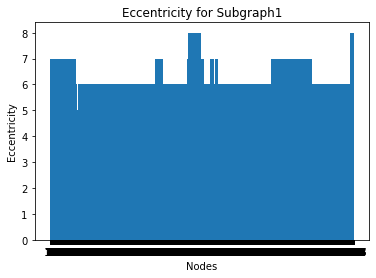

Radius for Subgraph1
4
-----
Diameter for Subgraph1
8
-----


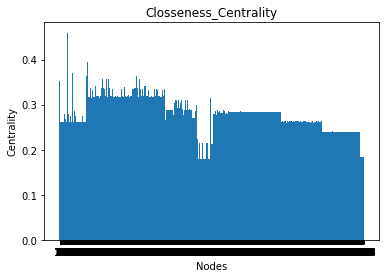

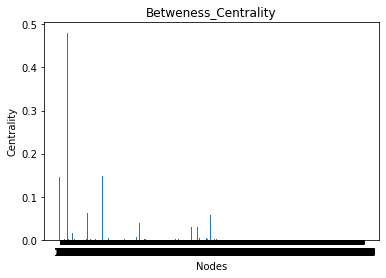

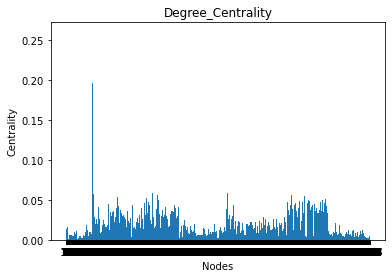

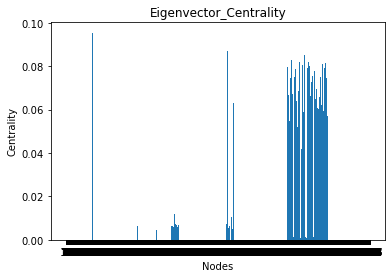

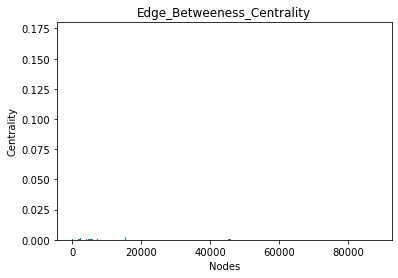

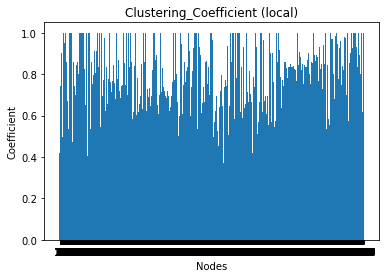

Clustering_Coefficient (global)
0.010819963503439287
-----
Average_Clustering
0.6055467186200876
-----


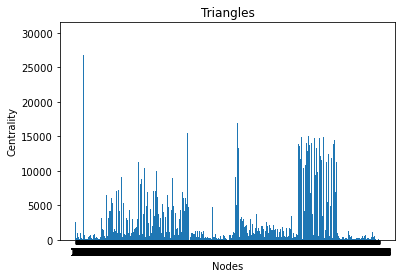

--------------------
Graph V

Number of vertexes
4039
-----
Number of Edges
898237
-----


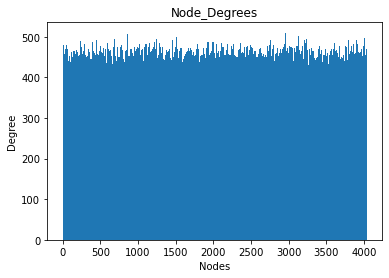

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [11]:
G=nx.read_edgelist('data/facebook_combined.txt')

metrics_calculation(G,V)